___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [61]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [62]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow import keras

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [64]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [65]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [67]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [68]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [69]:
X_train[:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

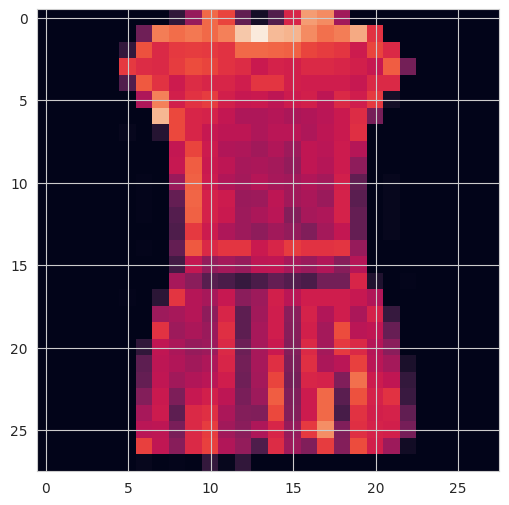

In [70]:
plt.imshow(X_train[3])
plt.show()

In [71]:
X_train[3].shape

(28, 28)

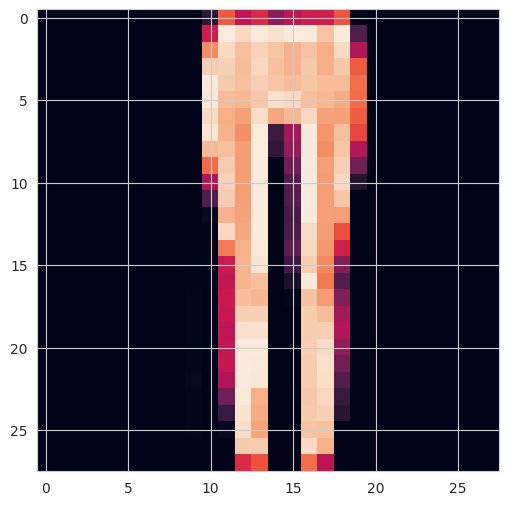

In [72]:
plt.imshow(X_train[103])
plt.show()

In [73]:
X_train[103].shape

(28, 28)

In [74]:
y_train.shape

(60000,)

In [75]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [76]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [77]:
classes[y_train[0]]

'Ankle boot'

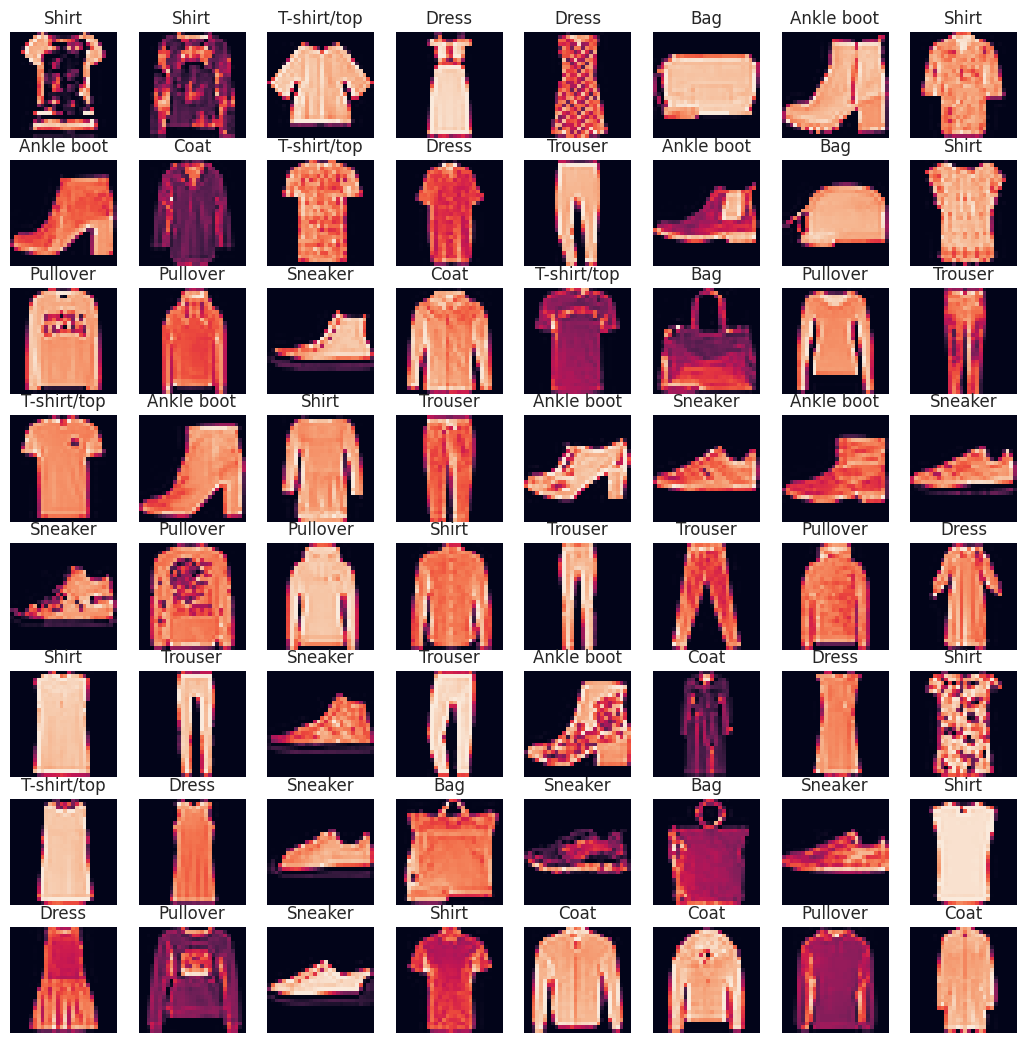

In [78]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(X_train[rand_index])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [79]:
x_train[103].max()

0.00392156862745098

In [80]:
x_train[103].min()

0.0

In [81]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [82]:
X_train[5].min()

0.0

In [83]:
X_train[5].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [84]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [85]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [86]:
X_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [87]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [88]:
from tensorflow.keras.utils import to_categorical

In [89]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [90]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [92]:
model = Sequential()

model.add(
    Conv2D(filters=28,
           kernel_size=(3,3),
           input_shape=(28, 28, 1),
           activation='relu',
           padding='same'
           )
    )
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics='accuracy')

In [93]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 27, 27, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 20412)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2612864   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2614434 (9.97 MB)
Trainable params: 2614434 (9.97 MB)
Non-trainable params: 0 (0.00 Byte)
________________

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [94]:
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
early_stop = EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)

In [95]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=15,
    validation_data=(X_test,Y_test),
    callbacks=[early_stop]
)

Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3777 - accuracy: 0.8668 - val_loss: 0.3207 - val_accuracy: 0.8848
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2505 - accuracy: 0.9092 - val_loss: 0.2744 - val_accuracy: 0.9031
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2099 - accuracy: 0.9244 - val_loss: 0.2631 - val_accuracy: 0.9062
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1784 - accuracy: 0.9357 - val_loss: 0.2859 - val_accuracy: 0.9049
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1571 - accuracy: 0.9426 - val_loss: 0.2870 - val_accuracy: 0.9066
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1382 - accuracy: 0.9500 - val_loss: 0.2833 - val_accuracy: 0.9080
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1228 - accuracy: 0.9565 - val_loss: 0.2978 - val_accuracy:

**TASK 7: Plot values of metrics you used in your model.**

In [97]:
model.metrics_names

['loss', 'accuracy']

In [96]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.378,0.867,0.321,0.885
1,0.250,0.909,0.274,0.903
2,0.210,0.924,0.263,0.906
3,0.178,0.936,0.286,0.905
4,0.157,0.943,0.287,0.907


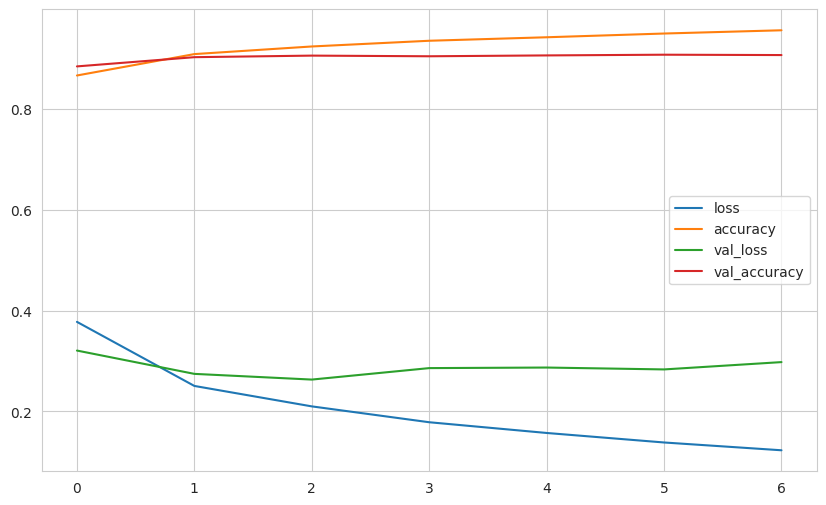

In [99]:
summary.plot()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [100]:
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2631 - accuracy: 0.9062


[0.263105571269989, 0.9061999917030334]

In [102]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.263105571269989
Test accuracy: 0.9061999917030334


## Prediction

In [103]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[3.4589004e-08, 8.1186592e-08, 7.5648211e-07, ..., 4.3857950e-04,
        7.3614819e-07, 9.9945790e-01],
       [3.1671971e-05, 9.5479883e-12, 9.9989748e-01, ..., 2.6864529e-13,
        4.0954282e-10, 7.1252999e-12],
       [2.8198768e-08, 9.9999988e-01, 2.8031055e-10, ..., 7.5555874e-11,
        3.9749287e-11, 2.1346215e-11],
       ...,
       [6.3160333e-06, 9.4434764e-12, 2.7770609e-06, ..., 4.7341185e-08,
        9.9984884e-01, 1.1361190e-08],
       [6.9063782e-10, 9.9999917e-01, 9.8250275e-10, ..., 1.5571497e-11,
        6.1220790e-12, 3.4134384e-10],
       [2.5997383e-03, 3.0552987e-05, 1.1692934e-02, ..., 6.5025888e-02,
        1.9404666e-02, 7.3855962e-03]], dtype=float32)

In [105]:
y_pred = np.argmax(pred_prob, axis=1)

In [106]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1000
           1       1.00      0.97      0.98      1000
           2       0.84      0.85      0.84      1000
           3       0.84      0.96      0.90      1000
           4       0.85      0.84      0.84      1000
           5       0.98      0.97      0.98      1000
           6       0.77      0.73      0.74      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [108]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [109]:
print(confusion_matrix(y_test, y_pred))

[[841   0  18  33   4   1  99   0   4   0]
 [  0 969   1  22   5   0   2   0   1   0]
 [ 15   0 851  14  62   0  58   0   0   0]
 [  6   2   7 963   6   0  16   0   0   0]
 [  1   0  65  55 836   0  43   0   0   0]
 [  1   0   0   0   0 974   0  13   0  12]
 [ 81   0  74  48  65   0 726   0   6   0]
 [  0   0   0   0   0   7   0 956   1  36]
 [  4   1   2   5   5   3   4   2 974   0]
 [  1   0   0   0   0   5   1  21   0 972]]


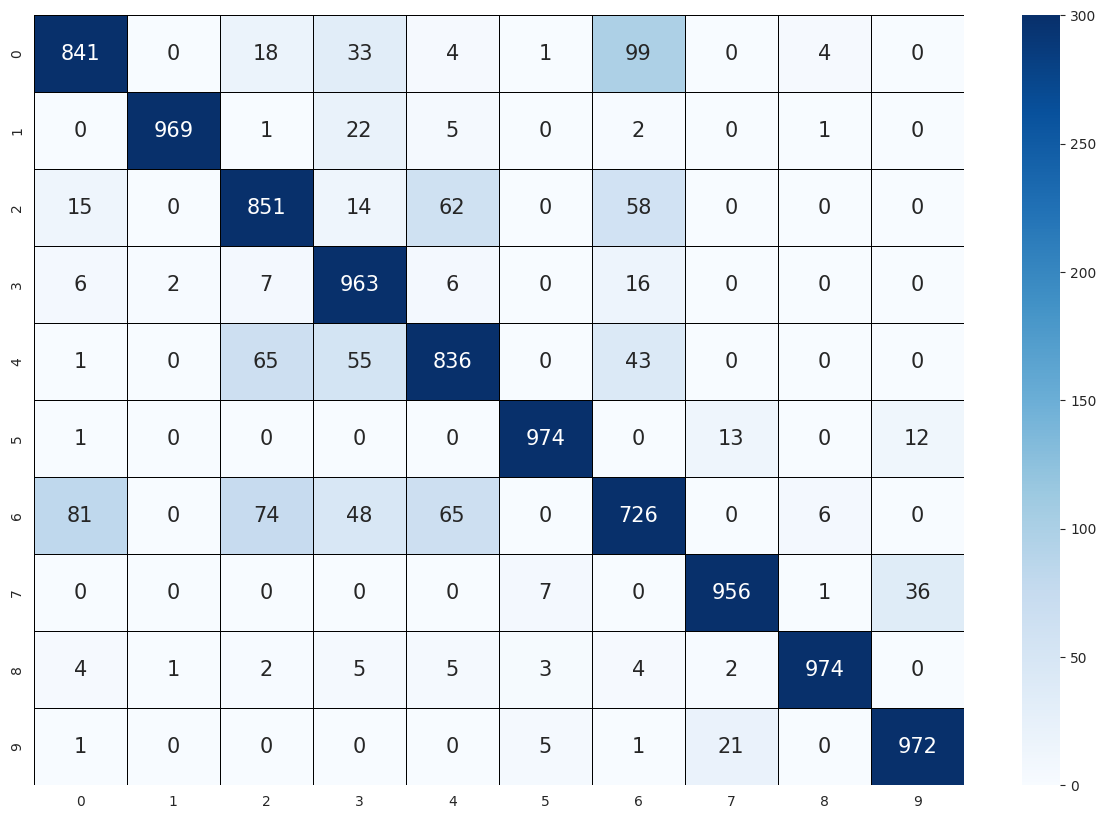

In [110]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
    vmax=300,
)
plt.show()

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___